In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\itsay\AppData\Local\Temp\ipykernel_3024\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv('sam_ECG.csv')              #reading csv files using pandas
df.head()

,time,ecg
0,729.500,0.546875
1,729.501,0.553125
2,729.502,0.540625
3,729.503,0.537500
4,729.504,0.553125


In [3]:
len(df)

310000

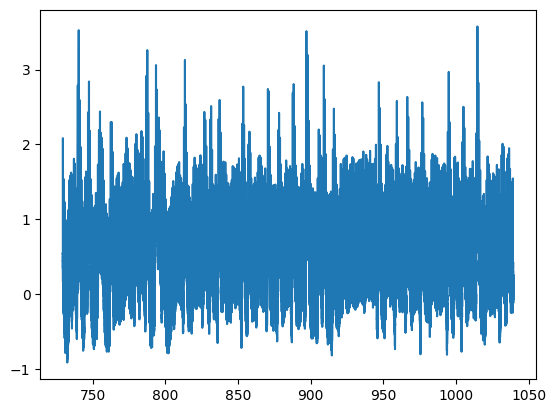

In [4]:
plt.plot(df.iloc[:,0],df.iloc[:,1])     #plotting the noisy esg signal

In [5]:
ecg=np.array(df.iloc[:,1])          #converting it to numpy array
time=np.array(df.iloc[:,0])

In [6]:
n=len(time)
fhat = np.fft.fft(ecg, n)                 #computing fast fourier transform
psd = fhat * np.conj(fhat) / n                  # computing power spectral density (used to check the intensity of signal accross various frequencies)
freq = (1 / (310000 * n)) * np.arange(n)   # creating a frequency matrix 
idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)  

c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


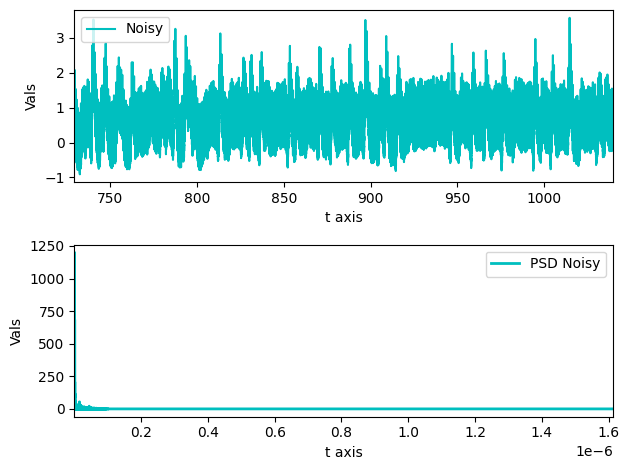

In [7]:
fig, axs = plt.subplots(2, 1)
#potting noisy signals and PSD graph
plt.sca(axs[0])
plt.plot(time, ecg, color='c', linewidth=1.5, label='Noisy')    
plt.xlim(time[0], time[-1])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[idxs_half], psd[idxs_half], color='c', linewidth=2, label='PSD Noisy')
plt.xlim(freq[idxs_half[0]], freq[idxs_half[-1]])

plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

In [8]:
threshold = 100 
psd_idxs = psd > threshold # this will be the array of 0 and 1
psd_clean = psd * psd_idxs # zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat # used to retreive the signal

signal_filtered = np.fft.ifft(fhat_clean) # inverse fourier transform

In [9]:
min_signal,max_signal=ecg.min(),ecg.max()

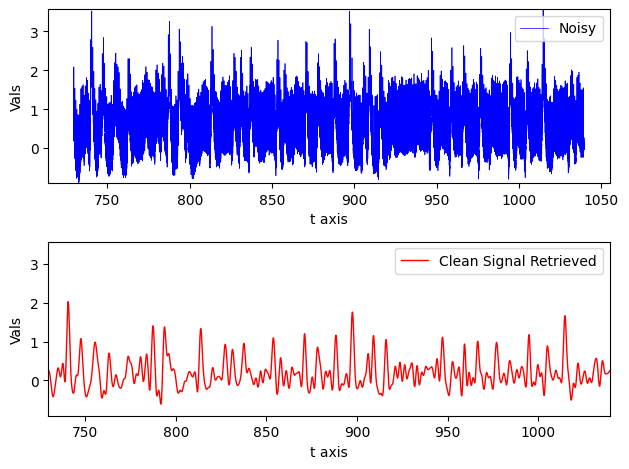

In [10]:
fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(time, ecg, color='b', linewidth=0.5, label='Noisy')    #plotting actual noisy signal
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(time, signal_filtered, color='r', linewidth=1, label='Clean Signal Retrieved') #plotting clear signal
plt.xlim(time[0], time[-1])
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

In [11]:
mean1=np.mean(signal_filtered) #finding mean of the filtered signal

Heart Rate: 87.31 BPM


c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


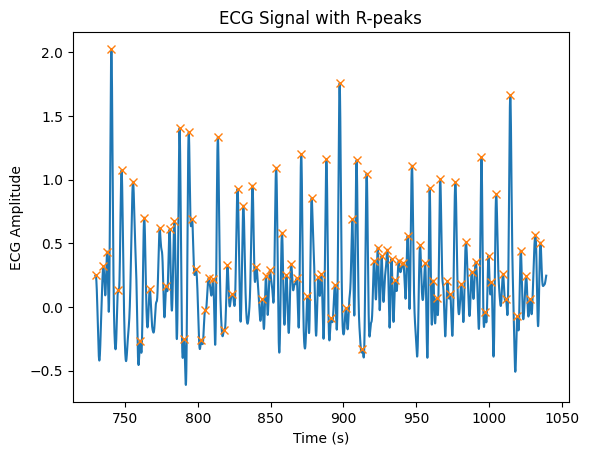

In [16]:
from scipy.signal import find_peaks
peaks, properties = find_peaks(signal_filtered)  #finding the peaks of the graph using find_peaks and setting height to mean


peaktimes=time[peaks]
peak_intervals = np.diff(peaktimes)   #calculating interval between peaks
average_peak_interval = np.mean(peak_intervals) #calculating average peak interval

# Plot the detected R-peaks on the ECG signal
plt.plot(time, signal_filtered)
plt.plot(peaktimes, signal_filtered[peaks], "x")
plt.title('ECG Signal with R-peaks')
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.show()